In [4]:
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

from scipy.ndimage.filters import maximum_filter
from scipy.ndimage.morphology import generate_binary_structure, binary_erosion 
from scipy.ndimage.morphology import iterate_structure

In [ ]:
## Eden Gorevoy 7/12/2018

In [24]:
# TESTING
# running this cell loads the PCM-encoded data for the trumpet clip
with open("../Vicious_Vishnus/data/piano.txt", 'r') as R:
    trumpet_audio = np.asarray([int(i) for i in R])
    
sampling_rate = 44100 # sampling rate in Hz

<IPython.core.display.Javascript object>


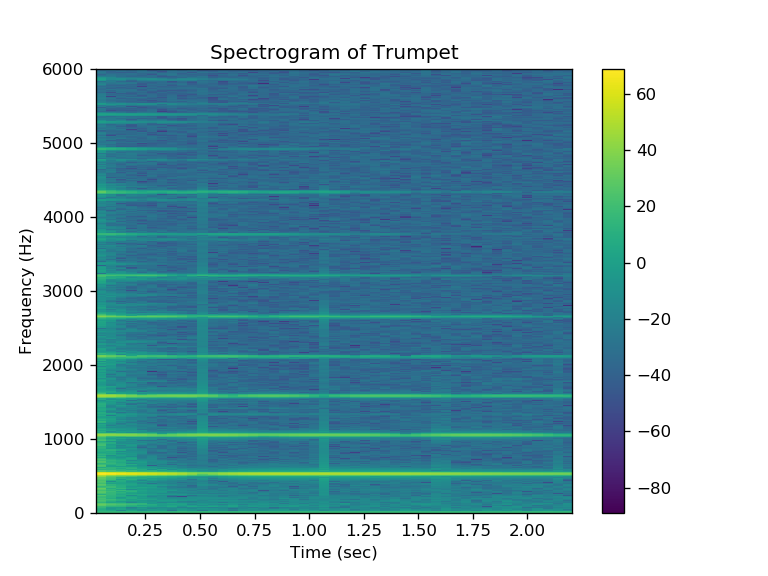

[ 37  36  34 ..., 246 262 275]


In [25]:
# TESTING

fig, ax = plt.subplots()

S, freqs, times, im = ax.specgram(trumpet_audio, NFFT=4096, Fs=sampling_rate,
                                  window=mlab.window_hanning,
                                  noverlap=4096 // 2)
fig.colorbar(im)

print(trumpet_audio)

ax.set_xlabel("Time (sec)")
ax.set_ylabel("Frequency (Hz)")
ax.set_title("Spectrogram of Trumpet")
ax.set_ylim(0, 6000);

In [26]:
def spectrogram_to_peaks(arr):
    """ 
    Creates a boolean array showing peaks, given data from a spectrogram.
    
    Parameters:
        arr: The array produced by the spectrogram from digital_to_spectrogram with shape (N,M)
        
    Returns:
        peaks: A boolean array with shape (N,M). Peaks in the data are where peaks == True.
    """
    # Creating the histogram
    arr_flattened = np.log(arr.flatten())
    N = arr_flattened.size # Number of elements in the array
    cnt, bin_edges = np.histogram(arr_flattened, bins=N//200, density=True)
    bin_width = np.diff(bin_edges) 
    
    ## print(np.sum(cnt*bin_width)) # check that summation = 1
    
    # Creating the cumulative distribution
    cumulative_distr = np.cumsum(cnt*bin_width)
    
    # Defining the cutoff
    frac_cut = 0.9
    bin_index_of_cutoff = np.searchsorted(cumulative_distr, frac_cut)
    
    # given the bin-index, we want the associated log-amplitude value for that bin
    cutoff_log_amplitude = bin_edges[bin_index_of_cutoff]
    
    # Defining the footprint
    fp = generate_binary_structure(rank=2,connectivity=2)
    
    peaks = ((arr > cutoff_log_amplitude) & (arr == maximum_filter(arr, footprint=fp)))
    
    return peaks

<IPython.core.display.Javascript object>


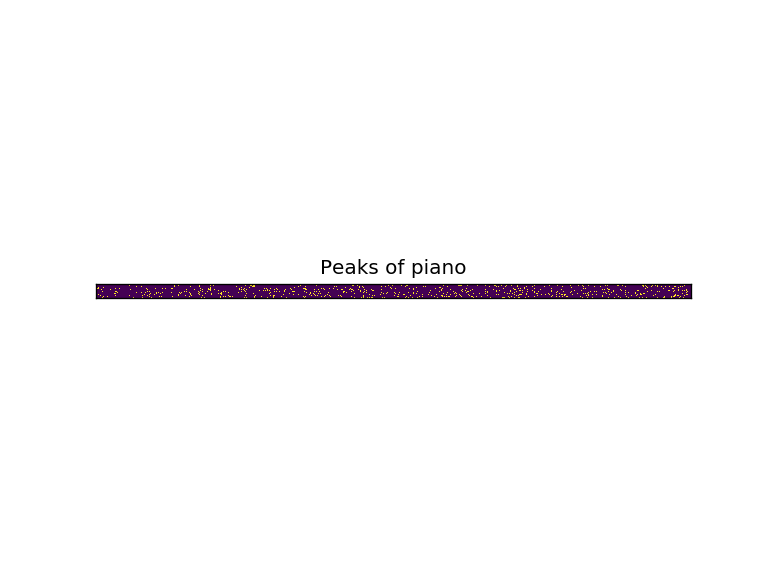

In [29]:
# TESTING
peaks = spectrogram_to_peaks(S)
fig, ax = plt.subplots()
ax.imshow(peaks.T)
ax.set_title("Peaks of piano")
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([]);